In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Telcom-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.MonthlyCharges=df.MonthlyCharges.astype(int)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.drop(columns=['customerID','tenure','MultipleLines','TotalCharges'], inplace=True)

In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,No
1,Male,0,No,No,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,No
2,Male,0,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,Yes
3,Male,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,No
4,Female,0,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,Yes
5,Female,0,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99,Yes
6,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89,No
7,Female,0,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29,No
8,Female,0,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104,Yes
9,Male,0,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56,No


In [ ]:
df[['Partner','Dependents','PhoneService','OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies','PaperlessBilling','Churn']]=df[['Partner','Dependents','PhoneService','OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies','PaperlessBilling','Churn']].replace({'Yes': 1, 'No':0})

<ipython-input-90-eafc131175b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Partner','Dependents','PhoneService','OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies','PaperlessBilling','Churn']]=df[['Partner','Dependents','PhoneService','OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies','PaperlessBilling','Churn']].replace({'Yes': 1, 'No':0})


In [ ]:
df.head(5)

,gender,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29,0
1,Male,0,0,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56,0
2,Male,0,0,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53,1
3,Male,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42,0
4,Female,0,0,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70,1


In [ ]:
df['gender']=df['gender'].replace({'Male': 1, 'Female':0})

<ipython-input-17-e70bbfc56109>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'Male': 1, 'Female':0})


In [ ]:
df.head(10)

,gender,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29,0
1,1,0,0,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56,0
2,1,0,0,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53,1
3,1,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42,0
4,0,0,0,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70,1
5,0,0,0,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99,1
6,1,0,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89,0
7,0,0,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29,0
8,0,1,0,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104,1
9,1,0,1,1,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56,0


Text(95.72222222222221, 0.5, 'DeviceProtection')

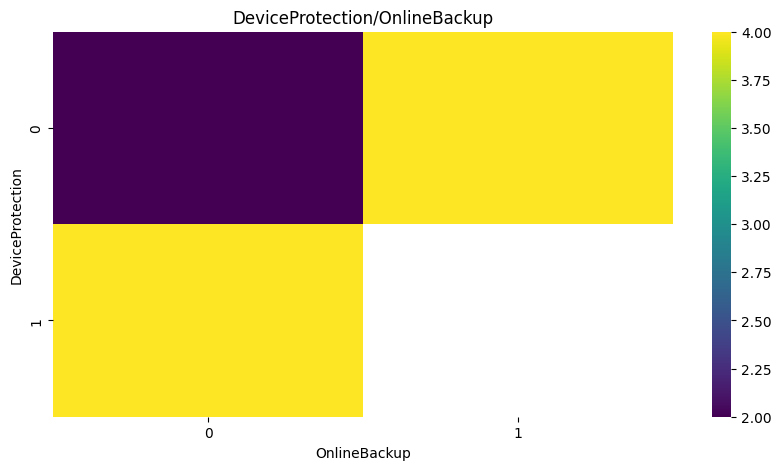

In [ ]:
# Purple=0,0; Yellow=1,0/0,1; White=No data Points
plt.subplots(figsize=(10,5))
df_2dhist = pd.DataFrame({
    x_label: grp['DeviceProtection'].value_counts()
    for x_label, grp in _df_18.groupby('OnlineBackup')
})
plt.title('DeviceProtection/OnlineBackup')
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('OnlineBackup')
plt.ylabel('DeviceProtection')

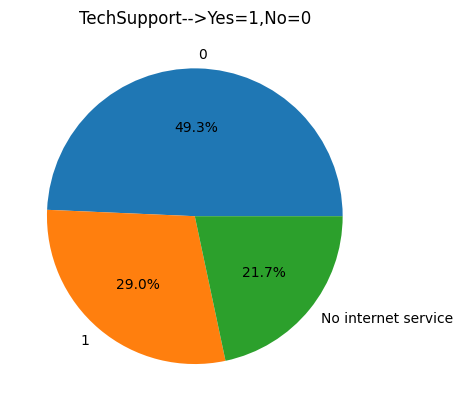

In [ ]:
plt.title('TechSupport-->Yes=1,No=0')
plt.pie(df.TechSupport.value_counts(),labels=df.TechSupport.unique(),autopct='%1.1f%%',startangle=360)
plt.show()

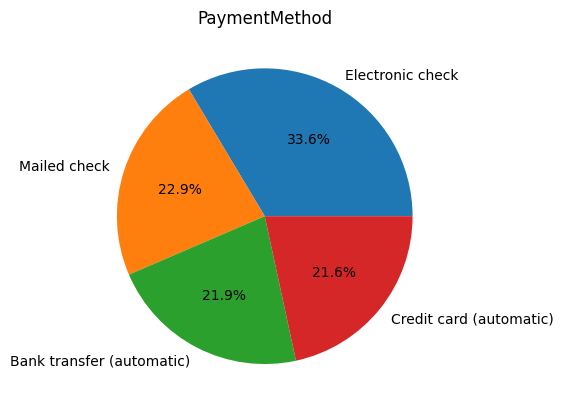

In [ ]:
plt.title('PaymentMethod')
plt.pie(df.PaymentMethod.value_counts(),labels=df.PaymentMethod.unique(),autopct='%1.1f%%',startangle=360)
plt.show()

<Axes: title={'center': 'InternetService'}, ylabel='InternetService'>

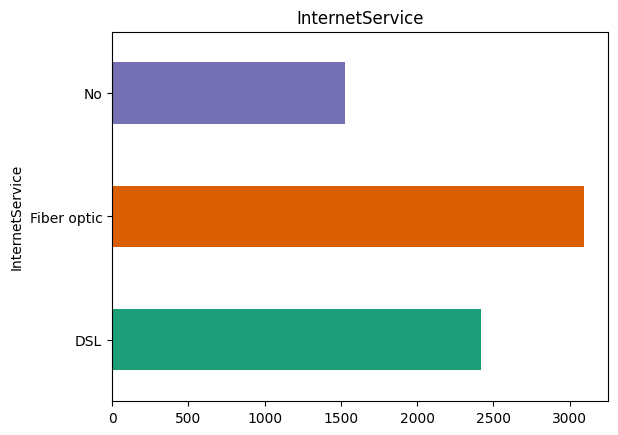

In [ ]:
plt.title('InternetService')
df.groupby('InternetService').size().plot(kind='barh', color=sns.color_palette('Dark2'))

<Axes: title={'center': 'Contract'}, ylabel='Contract'>

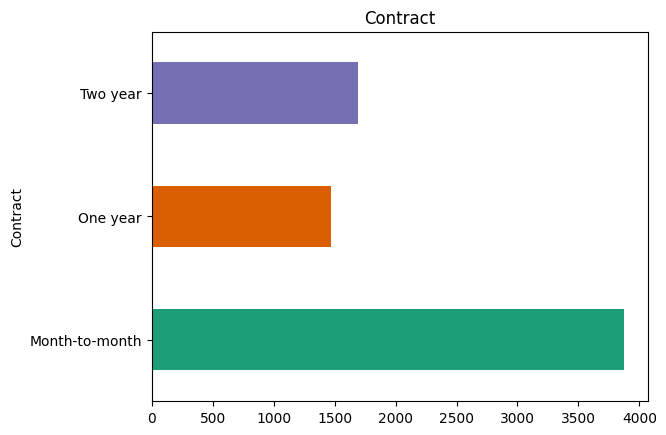

In [ ]:
plt.title('Contract')
df.groupby('Contract').size().plot(kind='barh', color=sns.color_palette('Dark2'))

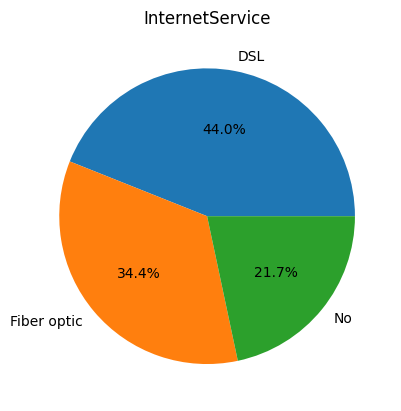

In [ ]:
plt.title('InternetService')
plt.pie(df.InternetService.value_counts(),labels=df.InternetService.unique(),autopct='%1.1f%%',startangle=360)
plt.show()

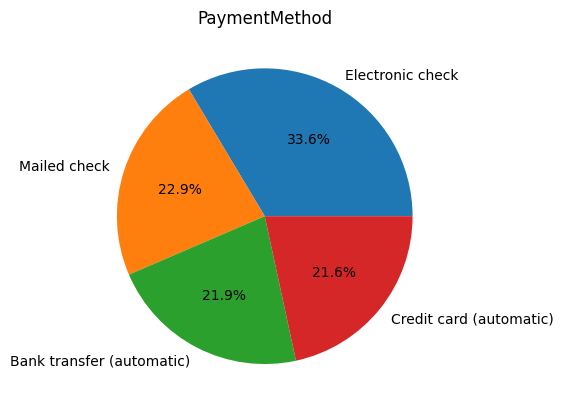

In [ ]:
plt.title('PaymentMethod')
plt.pie(df.PaymentMethod.value_counts(),labels=df.PaymentMethod.unique(),autopct='%1.1f%%',startangle=360)
plt.show()

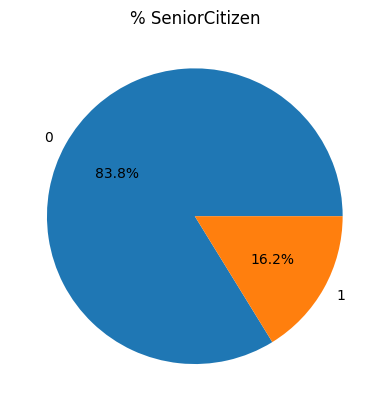

In [ ]:
plt.title('% SeniorCitizen')
plt.pie(df.SeniorCitizen.value_counts(),labels=df.SeniorCitizen.unique(),autopct='%1.1f%%',startangle=360)
plt.show()

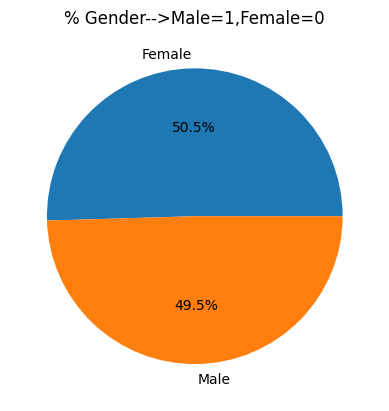

In [ ]:
plt.title('% Gender-->Male=1,Female=0')
plt.pie(df.gender.value_counts(),labels=df.gender.unique(),autopct='%1.1f%%',startangle=360)
plt.show()

<Axes: >

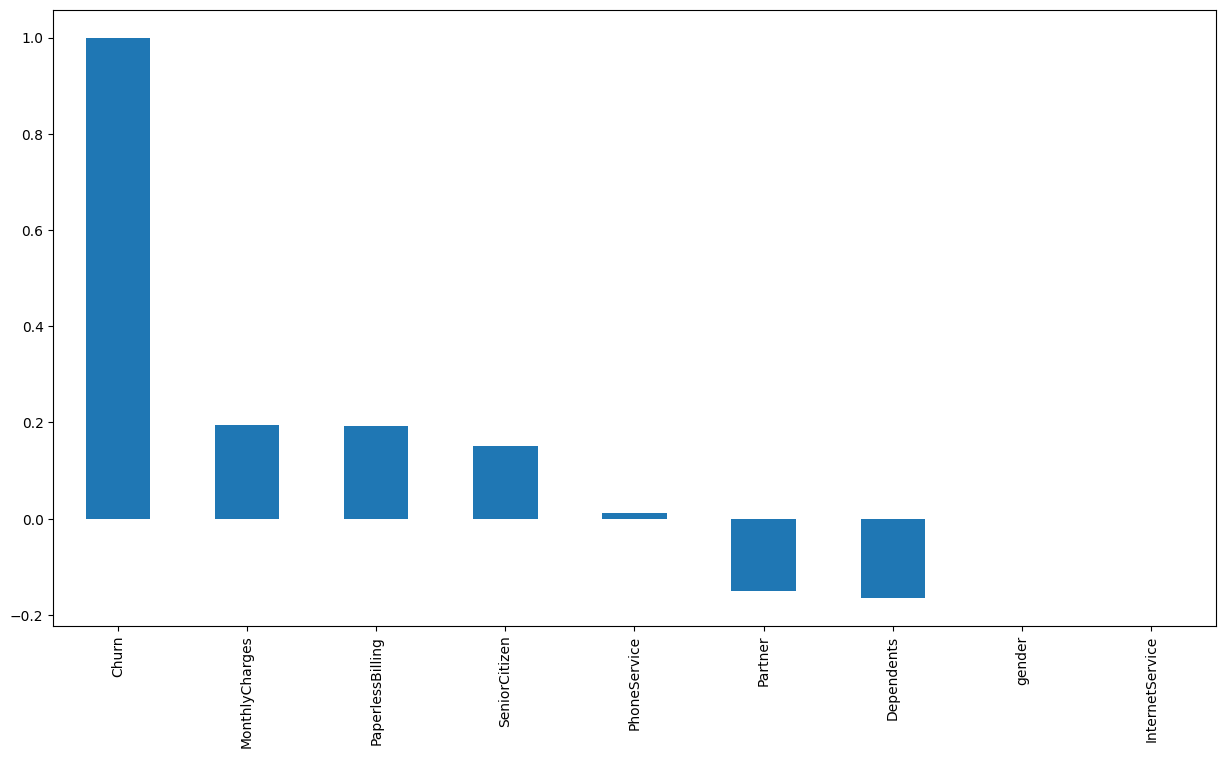

In [ ]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15, 8))
df['gender'] =df['gender'].map({'Male':1,'Female':0})
df['InternetService']=df['InternetService'].map({'DSL':1,'Fiber optic':2,'No':0})

numeric_df=df.select_dtypes(include=['number'])
numeric_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
